## 金融数据处理

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn
import tushare as ts
%matplotlib inline
import warnings; warnings.simplefilter('ignore') #忽略可能会出现的警告信息，警告并不是错误，可以忽略；

### 1. 高效获得金融数据

In [3]:
data = ts.get_k_data(['600030','300149'],  start = '2016-01-01', end = '2017-07-01')     #无法像yahoo一样同时调取多只股票；

In [4]:
data.head()

""


**1.1 获取单个对象数据**

In [5]:
#获得中信证券的股价信息
zxzq = ts.get_k_data('600030', start = '2016-01-01', end = '2017-07-01')
zxzq.head()

,date,open,close,high,low,volume,code
0,2016-01-04,17.905,16.225,17.905,16.169,1960583.0,600030
1,2016-01-05,15.593,16.382,16.689,15.436,2333291.0,600030
2,2016-01-06,16.290,16.642,16.846,15.965,1972783.0,600030
3,2016-01-07,16.225,15.166,16.336,15.036,679037.0,600030
4,2016-01-08,15.631,15.621,16.187,14.851,2979253.0,600030


In [6]:
# 获得指数数据
hs300 = ts.get_k_data('hs300',start = '2016-01-01', end = '2017-07-01')
hs300.head()

,date,open,close,high,low,volume,code
0,2016-01-04,3725.86,3470.41,3726.24,3469.01,115370674.0,hs300
1,2016-01-05,3382.18,3478.78,3518.22,3377.28,162116984.0,hs300
2,2016-01-06,3482.41,3539.81,3543.74,3468.47,145966144.0,hs300
3,2016-01-07,3481.15,3294.38,3481.15,3284.74,44102641.0,hs300
4,2016-01-08,3371.87,3361.56,3418.85,3237.93,185959451.0,hs300


In [7]:
# 设置日期为索引(看上去是日期，但实际并不是日期类型)
hs300.set_index('date', inplace = True)
hs300.index = pd.to_datetime(hs300.index)
hs300.head()

,open,close,high,low,volume,code
date,,,,,,
2016-01-04,3725.86,3470.41,3726.24,3469.01,115370674.0,hs300
2016-01-05,3382.18,3478.78,3518.22,3377.28,162116984.0,hs300
2016-01-06,3482.41,3539.81,3543.74,3468.47,145966144.0,hs300
2016-01-07,3481.15,3294.38,3481.15,3284.74,44102641.0,hs300
2016-01-08,3371.87,3361.56,3418.85,3237.93,185959451.0,hs300


In [8]:
hs300.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 363 entries, 2016-01-04 to 2017-06-30
Data columns (total 6 columns):
open      363 non-null float64
close     363 non-null float64
high      363 non-null float64
low       363 non-null float64
volume    363 non-null float64
code      363 non-null object
dtypes: float64(5), object(1)
memory usage: 19.9+ KB


####  1.2 同时获取多只股价信息

In [9]:
# 编写函数同时获得多只股票的数据
def multiple_stocks(tickers):
    def data(ticker):
        stocks = ts.get_k_data(ticker,start = '2016-01-01', end = '2017-07-01')    #定义了stocks这个daraFrame；
        stocks.set_index('date',inplace = True)
        stocks.index = pd.to_datetime(stocks.index)      #要把日期时间parse成python支持的datetime格式，不然很多python层面的操作无法完成；
        return  stocks             #返回的是进行完处理的stcoks这个DataFrame；
        
    datas = map(data, tickers)#    map（函数，序列）  映射  将tickers一个个拿出来用data函数调用
    
    return pd.concat(datas, keys=tickers, names=['Ticker', 'Date'])    #multiple_stocks函数返回的是拼接后的大DataFrame

In [10]:
# 获得以下三只股票数据
tickers = ['600030', '000001','600426']
all_stocks = multiple_stocks(tickers)
all_stocks.head()

open   close    high     low     volume    code
Ticker Date                                                         
600030 2016-01-04  17.905  16.225  17.905  16.169  1960583.0  600030
       2016-01-05  15.593  16.382  16.689  15.436  2333291.0  600030
       2016-01-06  16.290  16.642  16.846  15.965  1972783.0  600030
       2016-01-07  16.225  15.166  16.336  15.036   679037.0  600030
       2016-01-08  15.631  15.621  16.187  14.851  2979253.0  600030

#### 1.3 Muliple_stocks函数的背后思想 

In [11]:
stocks = ['600030', '002397', '000001']

stock_data0 = ts.get_k_data(stocks[0], start='2017-01-01', end='2017-01-15')
stock_data0.index = pd.to_datetime(stock_data0['date'])
del stock_data0['date']
stock_data0.head()

,open,close,high,low,volume,code
date,,,,,,
2017-01-03,15.365,15.470,15.508,15.326,623069.0,600030
2017-01-04,15.460,15.498,15.546,15.412,516717.0,600030
2017-01-05,15.517,15.431,15.537,15.403,478622.0,600030
2017-01-06,15.451,15.298,15.451,15.279,516640.0,600030
2017-01-09,15.298,15.355,15.403,15.259,398407.0,600030


In [12]:
stock_data1 = ts.get_k_data(stocks[1], start='2017-01-01', end='2017-01-15')
stock_data1.index = pd.to_datetime(stock_data1['date'])
del stock_data1['date']
stock_data1.head()

,open,close,high,low,volume,code
date,,,,,,
2017-01-03,7.917,7.995,8.024,7.917,24060.0,002397
2017-01-04,8.014,8.102,8.102,7.975,21333.0,002397
2017-01-05,8.102,8.578,8.744,8.034,157711.0,002397
2017-01-06,8.423,8.238,8.530,8.228,80911.0,002397
2017-01-09,8.160,8.238,8.277,8.160,44401.0,002397


In [13]:
stock_data2 = ts.get_k_data(stocks[2], start='2017-01-01', end='2017-01-15')
stock_data2.index = pd.to_datetime(stock_data2['date'])
del stock_data2['date']
stock_data2.head()

,open,close,high,low,volume,code
date,,,,,,
2017-01-03,8.834,8.883,8.902,8.815,459840.0,000001
2017-01-04,8.873,8.883,8.902,8.863,449329.0,000001
2017-01-05,8.892,8.892,8.902,8.873,344372.0,000001
2017-01-06,8.892,8.854,8.892,8.834,358154.0,000001
2017-01-09,8.854,8.873,8.892,8.834,361081.0,000001


In [14]:
pd.concat([stock_data0, stock_data1, stock_data2], keys=stocks, names=['code', 'date'])

open   close    high     low    volume    code
code   date                                                        
600030 2017-01-03  15.365  15.470  15.508  15.326  623069.0  600030
       2017-01-04  15.460  15.498  15.546  15.412  516717.0  600030
       2017-01-05  15.517  15.431  15.537  15.403  478622.0  600030
       2017-01-06  15.451  15.298  15.451  15.279  516640.0  600030
       2017-01-09  15.298  15.355  15.403  15.259  398407.0  600030
       2017-01-10  15.317  15.393  15.489  15.307  454018.0  600030
       2017-01-11  15.422  15.384  15.517  15.384  398776.0  600030
       2017-01-12  15.393  15.431  15.556  15.374  559594.0  600030
       2017-01-13  15.422  15.489  15.623  15.307  825208.0  600030
002397 2017-01-03   7.917   7.995   8.024   7.917   24060.0  002397
       2017-01-04   8.014   8.102   8.102   7.975   21333.0  002397
       2017-01-05   8.102   8.578   8.744   8.034  157711.0  002397
       2017-01-06   8.423   8.238   8.530   8.228   80911.0  002397
       2017-01-09   8.160   8.238   8.277   8.160   44401.0  002397
       2017-01-10   8.238   8.180   8.296   8.170   29406.0  002397
       2017-01-11   8.180   8.092   8.180   8.073   26046.0  002397
       2017-01-12   8.121   7.946   8.131   7.936   29279.0  002397
       2017-01-13   7.946   7.907   7.995   7.888   18457.0  002397
000001 2017-01-03   8.834   8.883   8.902   8.815  459840.0  000001
       2017-01-04   8.873   8.883   8.902   8.863  449329.0  000001
       2017-01-05   8.892   8.892   8.902   8.873  344372.0  000001
       2017-01-06   8.892   8.854   8.892   8.834  358154.0  000001
       2017-01-09   8.854   8.873   8.892   8.834  361081.0  000001
       2017-01-10   8.873   8.873   8.883   8.863  241053.0  000001
       2017-01-11   8.863   8.863   8.892   8.854  303430.0  000001
       2017-01-12   8.854   8.873   8.892   8.854  428006.0  000001
       2017-01-13   8.863   8.883   8.912   8.844  434301.0  000001

### 2. 金融数据可视化

In [15]:
close_price = all_stocks[['close']].reset_index()      #重置索引，让索引重新回到默认的0开始；
close_price.head()

,Ticker,Date,close
0,600030,2016-01-04,16.225
1,600030,2016-01-05,16.382
2,600030,2016-01-06,16.642
3,600030,2016-01-07,15.166
4,600030,2016-01-08,15.621


In [16]:
# 把所有的股价信息显示在一张表格里； 数据透视表 pivot；
daily_close = close_price.pivot(index = 'Date', 
                                columns = 'Ticker', 
                                values= 'close')
daily_close.head()

Ticker,000001,600030,600426
Date,,,
2016-01-04,8.995,16.225,7.518
2016-01-05,9.075,16.382,7.552
2016-01-06,9.179,16.642,7.801
2016-01-07,8.709,15.166,7.049
2016-01-08,8.852,15.621,7.252


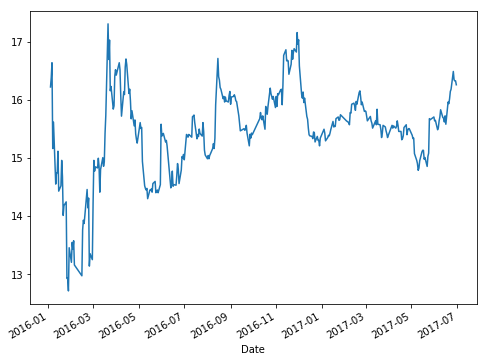

In [17]:
# plot 中信证券
daily_close['600030'].plot(figsize=(8,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A7FF9A0F0>,
      dtype=object)

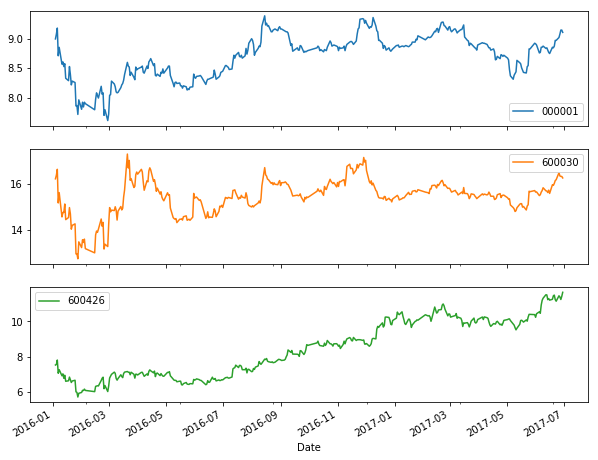

In [18]:
# plot 三只股票的股价信息
# daily_close.plot()
daily_close.plot(subplots= True, figsize=(10, 8))

### 3. 金融计算

#### 3.1 计算每日收益

In [19]:
# 用shift方法；
price_change = daily_close / daily_close.shift(1) - 1 #今收/昨收-100%
daily_close['yes_day'] = daily_close['000001'].shift(1)
price_change.ix[:,0:5].head()

Ticker,000001,600030,600426
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,0.008894,0.009676,0.004522
2016-01-06,0.011460,0.015871,0.032971
2016-01-07,-0.051204,-0.088691,-0.096398
2016-01-08,0.016420,0.030001,0.028798


In [20]:
del daily_close['yes_day'] 

In [21]:
#  用.pct_change() 方法
price_change2 = daily_close.pct_change()
price_change2.ix[:,0:2].head()

Ticker,000001,600030
Date,,
2016-01-04,NaN,NaN
2016-01-05,0.008894,0.009676
2016-01-06,0.011460,0.015871
2016-01-07,-0.051204,-0.088691
2016-01-08,0.016420,0.030001


In [22]:
# 将NaN值替换为0
price_change2.fillna(0, inplace=True)
price_change2.ix[:5,:]

Ticker,000001,600030,600426
Date,,,
2016-01-04,0.000000,0.000000,0.000000
2016-01-05,0.008894,0.009676,0.004522
2016-01-06,0.011460,0.015871,0.032971
2016-01-07,-0.051204,-0.088691,-0.096398
2016-01-08,0.016420,0.030001,0.028798


#### 3.2 计算累积收益

In [23]:
cum_daily_return = (1 + price_change2).cumprod()#cumprod 累乘
cum_daily_return.head()

Ticker,000001,600030,600426
Date,,,
2016-01-04,1.000000,1.000000,1.000000
2016-01-05,1.008894,1.009676,1.004522
2016-01-06,1.020456,1.025701,1.037643
2016-01-07,0.968205,0.934730,0.937616
2016-01-08,0.984102,0.962773,0.964618


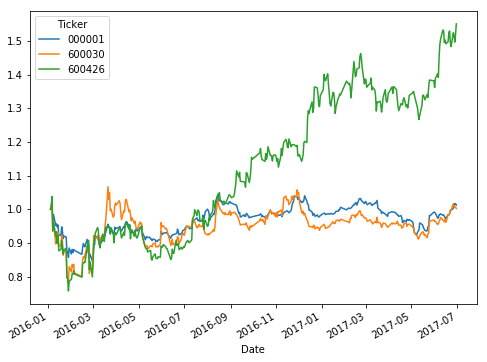

In [24]:
cum_daily_return.plot(figsize=(8,6))

### 4. 分析return分布

#### 4.1 直方图

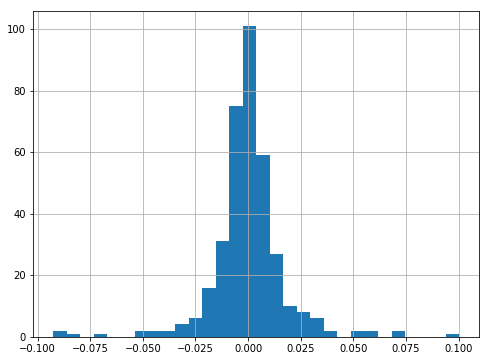

In [25]:
# 绘制频数分布直方图，分析中信证券的return分布；
zxzq = price_change['600030']
zxzq.hist(bins=30, figsize=(8,6));# hist柱状图  bins颗粒度越大越精细

In [26]:
zxzq.describe(percentiles=[0.025, 0.5, 0.975])

count    362.000000
mean       0.000169
std        0.018051
min       -0.092504
2.5%      -0.035293
50%        0.000000
97.5%      0.032923
max        0.100299
Name: 600030, dtype: float64

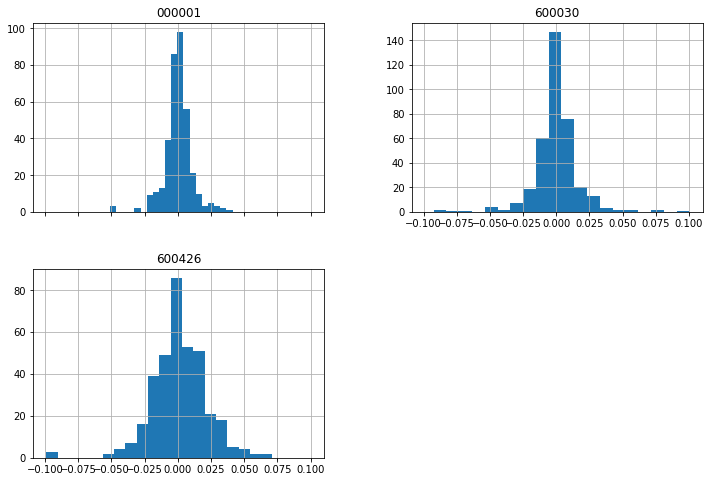

In [27]:
# 画出所有股票的股价分布：
_ = price_change.hist(bins=20, sharex=True, figsize=(12,8));

#### 4.2 QQ-Plots

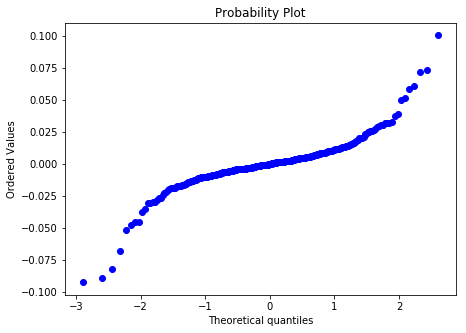

In [28]:
# 使用QQ图来验证股价retun分布；
# 实际情况中间拟合好，两端（不满足正态分布）拟合不好
import scipy.stats as stats
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
stats.probplot(zxzq, dist='norm', plot=ax)   #stats.probplot()用来绘制QQ图；
plt.show()

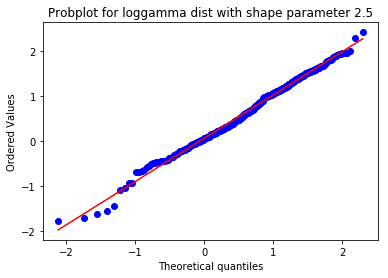

In [29]:
>>> fig = plt.figure()
>>> ax = fig.add_subplot(111)
>>> x = stats.loggamma.rvs(c=2.5, size=500)
>>> stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)
>>> ax.set_title("Probplot for loggamma dist with shape parameter 2.5")
>>> plt.show()

### 5. 股价相关性

In [30]:
# 计算沪深300指数收益
hs300_return = hs300['close'].pct_change().fillna(0)
hs300_return.head()

date
2016-01-04    0.000000
2016-01-05    0.002412
2016-01-06    0.017544
2016-01-07   -0.069334
2016-01-08    0.020392
Name: close, dtype: float64

In [31]:
price_change2.head()

Ticker,000001,600030,600426
Date,,,
2016-01-04,0.000000,0.000000,0.000000
2016-01-05,0.008894,0.009676,0.004522
2016-01-06,0.011460,0.015871,0.032971
2016-01-07,-0.051204,-0.088691,-0.096398
2016-01-08,0.016420,0.030001,0.028798


In [34]:
# 把沪深300的收益拼接到前面得到的大表中
return_all = pd.concat([hs300_return, price_change2], axis=1)
return_all.rename(columns={'close': 'hs300'}, inplace=True)
return_all.head()

,hs300,000001,600030,600426
2016-01-04,0.000000,0.000000,0.000000,0.000000
2016-01-05,0.002412,0.008894,0.009676,0.004522
2016-01-06,0.017544,0.011460,0.015871,0.032971
2016-01-07,-0.069334,-0.051204,-0.088691,-0.096398
2016-01-08,0.020392,0.016420,0.030001,0.028798


In [35]:
# 计算累积收益
cumreturn_all = (1 + return_all).cumprod()
cumreturn_all.head()

,hs300,000001,600030,600426
2016-01-04,1.000000,1.000000,1.000000,1.000000
2016-01-05,1.002412,1.008894,1.009676,1.004522
2016-01-06,1.019998,1.020456,1.025701,1.037643
2016-01-07,0.949277,0.968205,0.934730,0.937616
2016-01-08,0.968635,0.984102,0.962773,0.964618


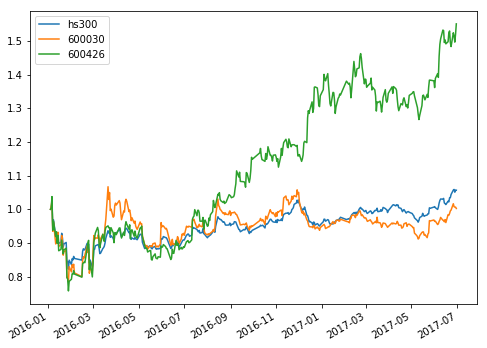

In [36]:
# 累积收益作图
cumreturn_all[['hs300', '600030', '600426']].plot(figsize=(8,6));

In [38]:
# 计算相关性#######################
corrs = return_all.corr()
corrs

,hs300,000001,600030,600426
hs300,1.000000,0.863687,0.879131,0.729135
000001,0.863687,1.000000,0.780178,0.612255
600030,0.879131,0.780178,1.000000,0.619993
600426,0.729135,0.612255,0.619993,1.000000


In [39]:
corrs.ix['hs300']

hs300     1.000000
000001    0.863687
600030    0.879131
600426    0.729135
Name: hs300, dtype: float64

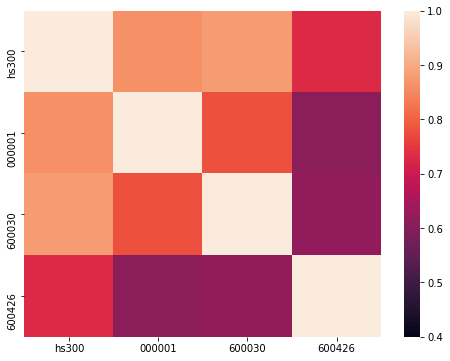

In [41]:
import seaborn
fig = plt.figure(figsize=(8,6))
seaborn.heatmap(corrs)

Text(0, 0.5, '000001')

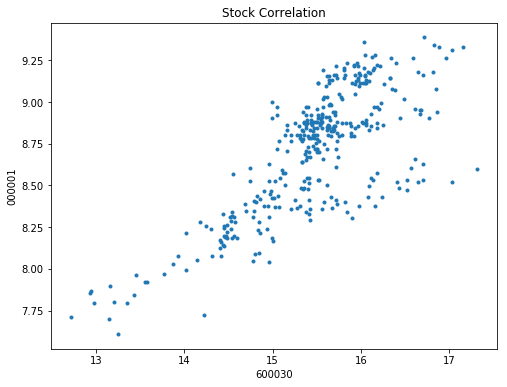

In [42]:
# 两个股票的相关性：散点图
plt.figure(figsize =(8,6))

plt.title('Stock Correlation')
plt.plot(daily_close['600030'], daily_close['000001'], '.')
plt.xlabel('600030')
plt.ylabel('000001')